# Jupyter Data Science Workflow

## From exploratory data analysis to reproducible science

### Sirish

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [24]:
import os
from urllib.request import urlretrieve

import pandas as pd 

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, 
                     ForceDownload = False):
    if ForceDownload or not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East'] # Adding a new column
    return data

In [26]:
data = get_fremont_data()

In [27]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [28]:
data_temp = pd.read_csv('Fremont.csv', index_col='Date')
data_temp.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
10/03/2012 12:00:00 AM,4.0,9.0
10/03/2012 01:00:00 AM,4.0,6.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,2.0,3.0
10/03/2012 04:00:00 AM,6.0,1.0


In [6]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


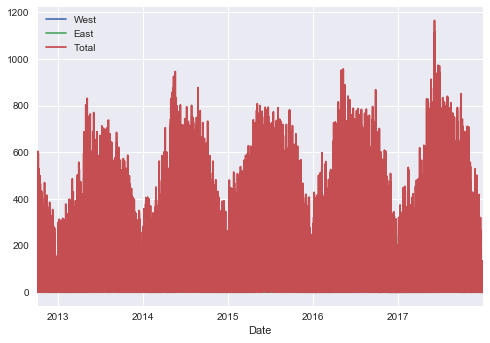

In [7]:
data.plot()

/Users/sirish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


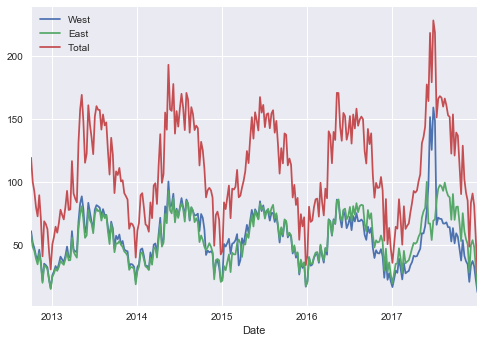

In [8]:
data.resample('W').plot()

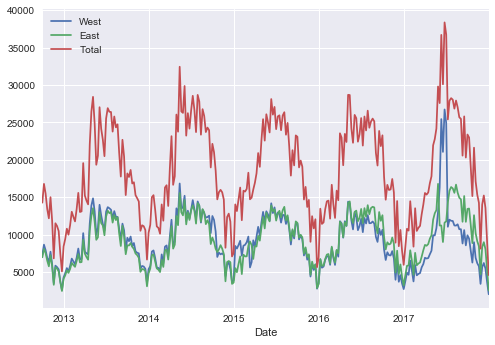

In [10]:
data.resample('W').sum().plot();

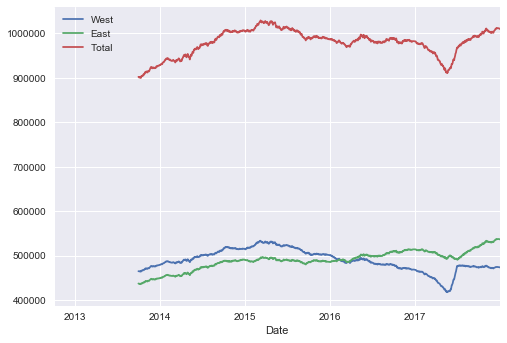

In [11]:
# Rolling 365 sum means ; From starting index 0 , roll the 364 values before it , then sum 'em
# till the first 364 the rolling sum will be Np.NaN 
data.resample('D').sum().rolling(365).sum().plot();

In [12]:
# What is rolling and its sum
df = pd.DataFrame([1,2,3,4,5,6])
ds = df.sum()
print('Sum of df is : ' , ds.values)

dr2 = df.rolling(2).sum()
print(dr2)

dr3 = df.rolling(3).sum()
print(dr3)

Sum of df is :  [21]
      0
0   NaN
1   3.0
2   5.0
3   7.0
4   9.0
5  11.0
      0
0   NaN
1   NaN
2   6.0
3   9.0
4  12.0
5  15.0


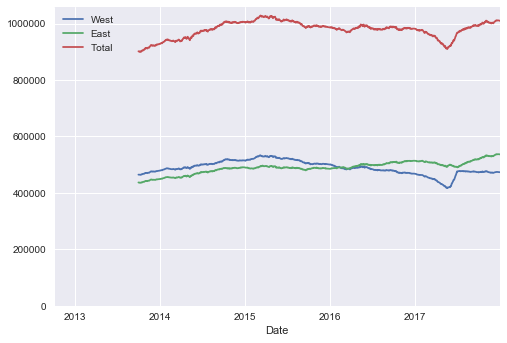

In [13]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None); # set y limit starting from 0 to None indicates whatever maximum

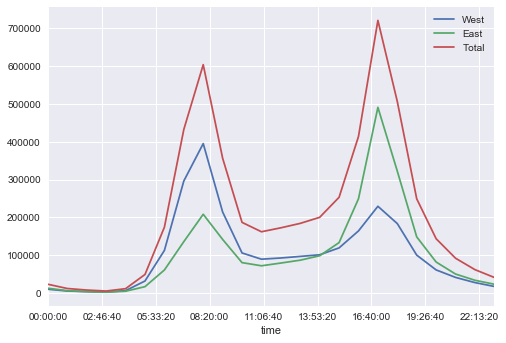

In [14]:
data.groupby(data.index.time).sum().plot();
# indicates people going into the city on the West side Walk
# people going out of the city on the East side Walk

In [15]:
# Now I want to see the whole dataset ; I might want to use pivot tabel for this
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date) # Here Total is the column name
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [16]:
# It is something like looking the total hourly usage of Walking tracks each day

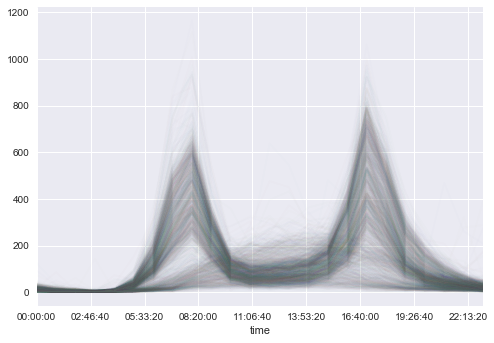

In [17]:
pivoted.plot(legend=False, alpha=0.01);

In [18]:
# so here we see that certain days we have a bimodal commute patterns , the two peaks for certain days
# and for certain days the graph just rises after 6 Am to 3Pm and drops

In [19]:
# Best hypothesis would be the two peaks days 'd we the Weekdays
# Single peak are Weekends